Current colaborators: Iván Martín Martín <p>
March 6th, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os

### **Path setup**

In [2]:
# RUN THIS NOTEBOOK FROM THE Modelo_11_estados FOLDER!
print(f"Remember working directory: {os.getcwd()}")

Remember working directory: /home/ines/Escritorio/epig


In [3]:
!mkdir my_results

### (1) **Analysis of the emission matrix**

From [1], the values correspond to the probability of
observing the mark of the column, conditioned on being in the state of the row.

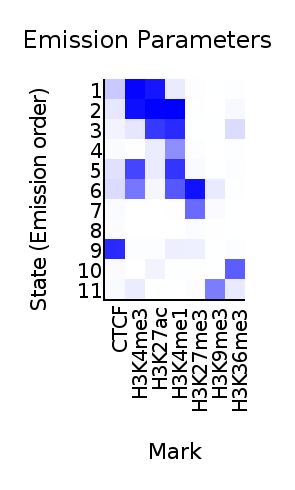

In [4]:
# Emission Matrix
display.Image("RESULTS/Modelo_11_estados/emissions_11_Master_11.png")

#### (1.1) **Reference chromatine state for insulators (CTCF)**

We decide to follow a criterion such that CTCF is considered in those states where there are a prob. of belongig to the state which is higher than or equal to 0.1 (10%).

In [5]:
# Emission matrix file
emission_matrix = pd.read_csv("RESULTS/Modelo_11_estados/emissions_11_Master_11.txt", sep="\t", index_col=0, header="infer")
emission_matrix

,CTCF,H3K4me3,H3K27ac,H3K4me1,H3K27me3,H3K9me3,H3K36me3
state (Emission order),,,,,,,
1,0.209389,0.969437,0.902838,0.079627,0.008275,0.002612,0.006032
2,0.091412,0.927374,0.981443,0.984251,0.004861,0.001057,0.025931
3,0.046216,0.095779,0.765510,0.823722,0.002787,0.002188,0.135051
4,0.018222,0.003675,0.073021,0.435898,0.007300,0.000315,0.006162
5,0.116682,0.718903,0.078272,0.785599,0.021810,0.002277,0.008994
6,0.140025,0.528463,0.035380,0.647790,0.919630,0.085764,0.006335
7,0.017177,0.000300,0.000117,0.003130,0.576015,0.019912,0.001637
8,0.010846,0.000454,0.000308,0.000512,0.013342,0.004657,0.001370
9,0.823642,0.010235,0.009349,0.065067,0.063280,0.001342,0.009285


In [6]:
# Selected states for CTCF according to criterion: prob. of belonging to state >= 10%
states_for_CTCF = emission_matrix[emission_matrix["CTCF"] >= 0.1].index

# Selected states
states_for_CTCF_df = emission_matrix.loc[states_for_CTCF, "CTCF"]
states_for_CTCF_list = [f"E{n_state}" for n_state in states_for_CTCF]
print(f"Selected states for CTCF: {states_for_CTCF_list}")

Selected states for CTCF: ['E1', 'E5', 'E6', 'E9']


In [8]:
# Note that the most significant state is E9, given the outstanding prob. of CTCF to be in this state
states_for_CTCF_df

state (Emission order)
1    0.209389
5    0.116682
6    0.140025
9    0.823642
Name: CTCF, dtype: float64

#### (1.2) **Further analysis of state 9**

Following the same criteria for the analysis of chromatine state 9, the probability of belonging to E9 of any mark besides CTCF is lower than 10%.

In [7]:
emission_matrix.loc[9]

CTCF        0.823642
H3K4me3     0.010235
H3K27ac     0.009349
H3K4me1     0.065067
H3K27me3    0.063280
H3K9me3     0.001342
H3K36me3    0.009285
Name: 9, dtype: float64

In [9]:
significant_marks_for_E9 = list(emission_matrix.columns[emission_matrix.loc[9] >= 0.05])
print(f"significant_marks_for_E9: {significant_marks_for_E9}")

significant_marks_for_E9: ['CTCF', 'H3K4me1', 'H3K27me3']


### (2) **Task 1: common segments between replicates**
Obtain the segments that have the same state in the two replicates of monocytes.

* **TOOL**: bedtools <p>
* **INSTALL**: sudo apt-get install bedtools

**Files of segments**:
* Monocyte1_11_Master_11_segments.bed
* Monocyte2_11_Master_11_segments.bed

**Why beedtools**

Monocyte1 and Monocyte2 replicates do not have the same number of segments, thus each analogous segment per monocyte does not have the same length (*compare files line by line*). Assuming that the length of coverage of the whole DNA in the Chip-seq experiment was the same for both Monocytes (<span style="color:red">*</span>), Monocyte1 had longer segments captured.

Thus we use Monocyte1 segments as reference for selection of common segments for both replicates, since they are longer and might contain one or more segments from Monocyte2. 

In this sense, a reasonable (minimum) overlap required for common segments, as a fraction of Monocyte1 segments, would be 90% (i.e. maximizing coverage). 

In [10]:
# 327218 segments selected (with common state between Monocyte1 and Monocyte2) 
!bedtools intersect -a Monocyte1_11_Master_11_segments.bed -b Monocyte2_11_Master_11_segments.bed -f 0.9 | wc -l

Error: Unable to open file Monocyte1_11_Master_11_segments.bed. Exiting.
0


In [11]:
# Bash command for common segments
!bedtools intersect -a RESULTS/Modelo_11_estados/Monocyte1_11_Master_11_segments.bed -b RESULTS/Modelo_11_estados/Monocyte2_11_Master_11_segments.bed -f 0.9 > my_results/common_segments.bed

(<span style="color:red">*</span>) If we check the last segment in both files, the end coordinate is in both cases: 155270400.

In [12]:
# File check Monocyte1
!cat RESULTS/Modelo_11_estados/Monocyte1_11_Master_11_segments.bed | tail -n 1

# File check Monocyte1
!cat RESULTS/Modelo_11_estados/Monocyte2_11_Master_11_segments.bed | tail -n 1

chrX	155258600	155270400	E8
chrX	155258600	155270400	E8


#### (2.1) **Filtering of common segments by our chromatine mark of reference**

With the last information, common segments segments for both replicates are filtered according to our states of interest for CTCF.

In [13]:
common_segments = pd.read_csv("my_results/common_segments.bed", sep="\t", index_col=None, header=None)
common_segments.head(10)

,0,1,2,3
0,chr10,0,73800,E8
1,chr10,95400,96000,E11
2,chr10,103400,104400,E11
3,chr10,115200,115600,E7
4,chr10,115600,118600,E8
5,chr10,118600,119600,E7
6,chr10,122200,122800,E6
7,chr10,125400,125800,E7
8,chr10,125800,134600,E8
9,chr10,134800,135400,E7


In [14]:
# Filtering of common segments according to chromatine states for CTCF
filtered_common_segments = common_segments[common_segments[3].isin(states_for_CTCF_list)]
common_segments.to_csv("my_results/filtered_common_segments.bed", sep="\t", index=False, header=False)
filtered_common_segments.head(10)

,0,1,2,3
6,chr10,122200,122800,E6
10,chr10,173600,174000,E5
11,chr10,180800,181400,E5
13,chr10,181800,182200,E1
34,chr10,340200,340600,E9
37,chr10,375400,375800,E5
46,chr10,440400,440600,E1
49,chr10,493000,493400,E9
52,chr10,530400,530600,E5
53,chr10,530600,530800,E1


In [15]:
print(f"Selected states for CTCF: {states_for_CTCF_list}")
print(f"filtered_common_segments.shape: {filtered_common_segments.shape}")

Selected states for CTCF: ['E1', 'E5', 'E6', 'E9']
filtered_common_segments.shape: (59327, 4)


#### (2.2) **Consideration**

I thought it might be less biased to first obtain common segments between replicates (`bedtools`) and then select by those chromatine states we are interested in (filtering with Python).

This is because performing the process the other way around meant to first select the chromatine states of reference for us, thus potentially disorganizing the *segments.bed* files and biasing the further use of the `bedtools *intersect*` command.

However, I am not sure whether I am right in this statement.

### (3) **Task 2: annotation**
Annotate the segments. As a minimum, the percentage of segments that overlap with protein-coding genes.

#### (3.1) **Initial considerations**

* I assume we have to annotate segments for both monocytes altogether since they are replicates. How do we integrate them?

    - Mean, median, we do not integrate them (...)

* Since we are working with segments associated to a given chromatine state, we have to take the chromatine state as reference

In [15]:
# From https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython
import IPython.display as display
import ipywidgets as widgets

# Images
img1=open('Monocyte1_11_Master_11_overlap.png','rb').read()
wi1 = widgets.Image(value=img1, format='png', width=600, height=500)
img2=open('Monocyte2_11_Master_11_overlap.png','rb').read()
wi2 = widgets.Image(value=img2, format='png', width=600, height=500)

# Display
images=[wi1,wi2]
widgets=widgets.HBox(images)
display.display(widgets)

In [16]:
# Overlap for Monocyte1
# display.Image("Monocyte1_11_Master_11_overlap.png")

In [17]:
# Overlap for Monocyte2
# display.Image("Monocyte2_11_Master_11_overlap.png")

### (3.2) **External annotations**

In the **overlap files**:

* The last row indicates the percentage of the genome that each external annotation covers

* The second column contains the **percentage** of the genome each state covers.

* The remaining rows correspond to different states, and the remaining columns correspond to different external annotations. The values in these rows and columns correspond to the **fold enrichments** for the presence of the external annotation in the state. 

* The **fold enrichments** are computed as the ratio of the fraction of bases assigned to the state that are in the external category to the fraction of bases in the genome that are in the external category.

In [18]:
# Overlap files
overlap1 = pd.read_csv("Monocyte1_11_Master_11_overlap.txt", sep="\t", index_col=0, header="infer")
overlap2 = pd.read_csv("Monocyte2_11_Master_11_overlap.txt", sep="\t", index_col=0, header="infer")

In [19]:
overlap1

,Genome %,CpGIsland.hg19.bed.gz,RefSeqExon.hg19.bed.gz,RefSeqGene.hg19.bed.gz,RefSeqTES.hg19.bed.gz,RefSeqTSS.hg19.bed.gz,RefSeqTSS2kb.hg19.bed.gz,laminB1lads.hg19.bed.gz
state (Emission order),,,,,,,,
1,0.40137,74.89854,10.49836,1.65037,2.63995,81.44753,23.80095,0.23949
2,0.88383,5.43656,2.70658,1.50790,2.81318,5.69143,9.45445,0.32567
3,1.28059,0.28180,1.90533,1.60112,2.05081,0.91093,1.70562,0.35022
4,2.86578,0.31482,0.98772,1.35721,1.38133,0.94440,2.59023,0.45625
5,0.45894,16.80668,3.65947,1.37630,2.78117,16.60881,13.76879,0.37878
6,0.37829,57.33654,6.82791,1.33658,3.57747,26.84727,16.17356,0.46718
7,3.53242,4.84496,1.73920,1.00473,1.87599,2.84629,4.10311,0.83328
8,80.74127,0.13347,0.53607,0.85669,0.63031,0.31712,0.48695,1.12618
9,0.40788,1.01954,1.42572,1.02982,1.86903,1.16516,1.26673,0.80337


In [20]:
overlap2

,Genome %,CpGIsland.hg19.bed.gz,RefSeqExon.hg19.bed.gz,RefSeqGene.hg19.bed.gz,RefSeqTES.hg19.bed.gz,RefSeqTSS.hg19.bed.gz,RefSeqTSS2kb.hg19.bed.gz,laminB1lads.hg19.bed.gz
state (Emission order),,,,,,,,
1,0.44133,67.48787,9.65246,1.64552,2.56729,74.76465,22.76300,0.26428
2,0.87704,6.34021,2.68710,1.49212,2.64756,5.72495,8.97630,0.33761
3,1.01479,0.40985,2.21323,1.62178,2.28126,1.10390,1.76557,0.35291
4,2.18908,0.70327,1.12408,1.35295,1.52239,1.40269,2.82142,0.41765
5,0.59483,13.37636,3.07783,1.38349,2.58089,12.22844,11.72701,0.40153
6,0.34489,58.45514,6.92648,1.33707,3.37642,26.61092,16.24322,0.48230
7,4.86190,3.35929,1.40043,0.96559,1.58598,2.14098,3.12294,0.95782
8,79.69375,0.13868,0.52885,0.85982,0.62301,0.31548,0.49330,1.12101
9,0.79116,1.49248,1.79957,1.04435,2.35150,1.57197,1.63290,0.68811


In [36]:
# Just for Genome Coverage
def annotate_genome(state, rep1df, rep2df):
    
    # Values for y, x-axes
    genome_perc = [rep1df.loc[str(state), "Genome %"], rep2df.loc[str(state), "Genome %"]]  # Note: str(state)
    labels = ["Monocyte1", "Monocyte2"]
    
    # Plot
    plt.ylabel("Genome %", fontsize=10, fontweight='bold')
    plt.xlabel("Replicate", fontsize=10, fontweight='bold')
    plt.title("Genome coverage", size="x-large", fontweight='bold')
    plt.bar(labels, genome_perc, width=0.75)
    plt.show()

In [37]:
# Ref: https://pythonguides.com/matplotlib-multiple-bar-chart/
# Just for External Annotations
def external_annotations(rep1df, rep2df):
    
    # Replicate dataframes
    rep1df_noG = rep1df.drop(['Genome %'], axis=1)
    rep2df_noG = rep2df.drop(['Genome %'], axis=1)

    # Define Data
    labels = list(rep1df_noG.columns)
    rep1 = rep1df_noG.loc[str(state),].to_numpy()  # Note: str(state)
    rep2 = rep2df_noG.loc[str(state),].to_numpy()  # Note: str(state)

    # Multi bar Chart
    x_axis = np.arange(len(labels))
    plt.bar(x_axis -0.2, rep1, width=0.4, label = 'Monocyte1')
    plt.bar(x_axis +0.2, rep2, width=0.4, label = 'Monocyte2')

    # Xticks, Labels & Legend
    plt.xticks(x_axis, labels, rotation=45)
    plt.xlabel("Annotations", fontsize=10, fontweight='bold')
    plt.ylabel("Fold Enrichment", fontsize=10, fontweight='bold')
    plt.title("External Annotation", size="x-large", fontweight='bold')
    plt.legend()

    # Final Display
    plt.show()

In [110]:
# Final, composed function
def complete_external_annotations(state, rep1df, rep2df):
    
    # Global Figure
    fig = plt.figure(state, figsize=(15,7))
    
    # GENOME COVERAGE
    # Values for y, x-axes
    genome_perc = [rep1df.loc[str(state), "Genome %"], rep2df.loc[str(state), "Genome %"]]  # Note: str(state)
    labels = ["Monocyte1", "Monocyte2"]
    
    # Plot
    ax1 = fig.add_subplot(121)
    ax1.set_ylabel("Genome %", fontsize=10, fontweight='bold')
    ax1.set_xlabel("Replicate", fontsize=10, fontweight='bold')
    ax1.set_title("Genome coverage", size="x-large", fontweight='bold')
    ax1.bar(labels, genome_perc, width=0.6)
    
    # EXTERNAL ANNOTATIONS
    # Replicate dataframes
    rep1df_noG = rep1df.drop(['Genome %'], axis=1)
    rep2df_noG = rep2df.drop(['Genome %'], axis=1)

    # Define Data
    labels = [name.split(".")[0] for name in list(rep1df_noG.columns)]
    rep1 = rep1df_noG.loc[str(state),].to_numpy()  # Note: str(state)
    rep2 = rep2df_noG.loc[str(state),].to_numpy()  # Note: str(state)

    # Multi bar Chart
    ax2 = fig.add_subplot(122)
    x_axis = np.arange(len(labels))
    ax2.bar(x_axis -0.2, rep1, width=0.4, label = 'Monocyte1')
    ax2.bar(x_axis +0.2, rep2, width=0.4, label = 'Monocyte2')

    # Xticks, Labels & Legend
    ax2.set_xticks(x_axis, labels, rotation=55, fontsize=14)
    ax2.set_ylabel("Fold Enrichment", fontsize=10, fontweight='bold')
    ax2.set_xlabel("Annotations", fontsize=10, fontweight='bold')
    ax2.set_title("External Annotation", size="x-large", fontweight='bold')
    ax2.legend()

    # Final Display
    fig.suptitle(f"State: E{state}\n=======", fontsize=16)
    fig.show()

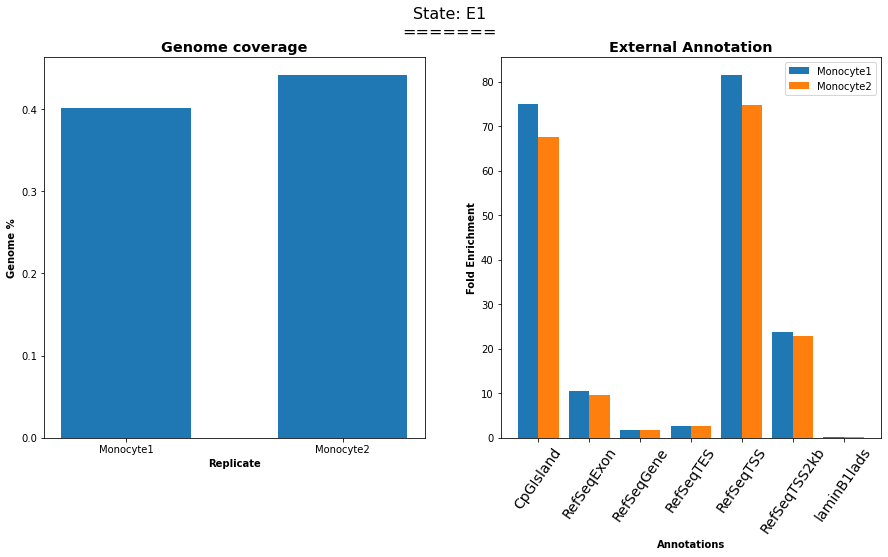

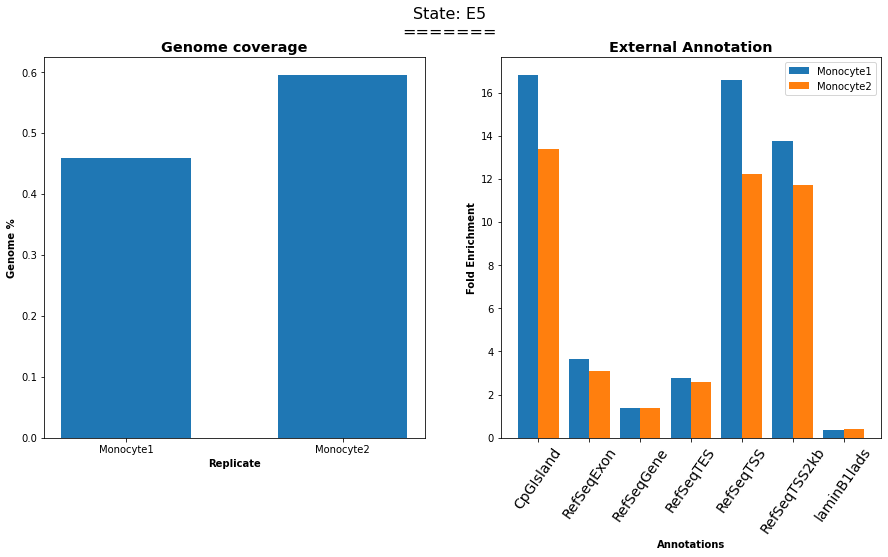

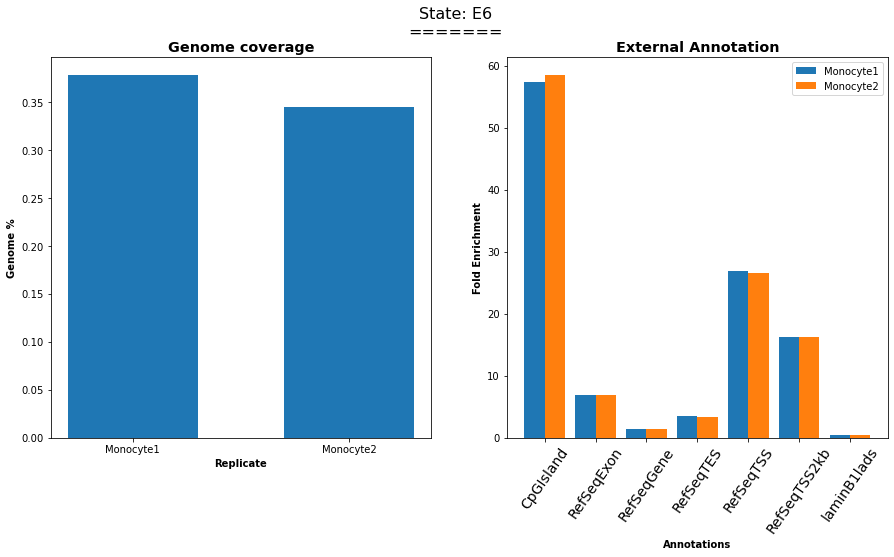

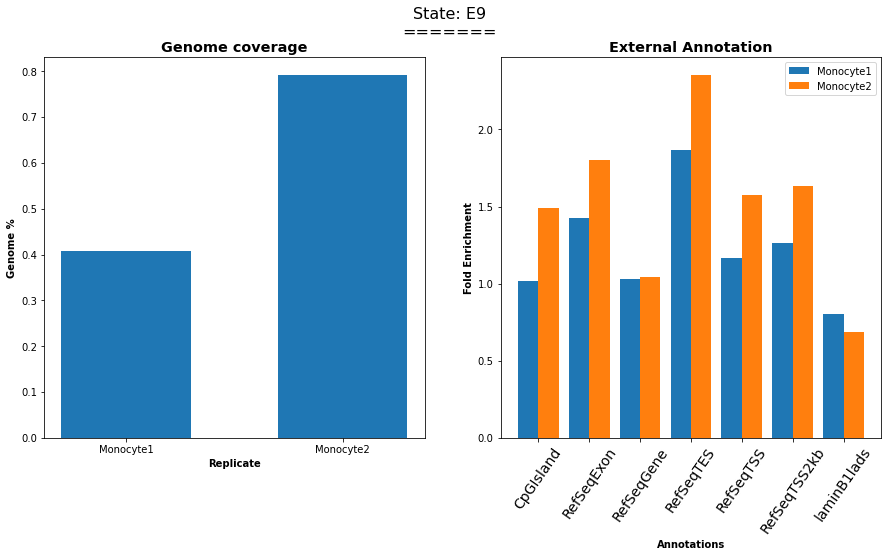

In [111]:
# For each one of our selected states
for state in list(states_for_CTCF):
    complete_external_annotations(state, overlap1, overlap2)
    print()

### (3.3) **Further annotation with bed files**

In [101]:
!cat Monocyte2_11_Master_11_dense.bed | head

track name="Monocyte2_11_Master_11" description=" Monocyte2_11_Master_11 (Emission ordered)" visibility=1 itemRgb="On"
chr10	0	73800	8	0	.	0	73800	255,0,204
chr10	73800	75000	11	0	.	73800	75000	255,255,0
chr10	75000	78000	8	0	.	75000	78000	255,0,204
chr10	78000	78400	11	0	.	78000	78400	255,255,0
chr10	78400	95200	8	0	.	78400	95200	255,0,204
chr10	95200	96600	11	0	.	95200	96600	255,255,0
chr10	96600	102800	8	0	.	96600	102800	255,0,204
chr10	102800	104800	11	0	.	102800	104800	255,255,0
chr10	104800	107400	8	0	.	104800	107400	255,0,204
cat: write error: Broken pipe


### (x) **Bibliography**

[1] Ernst, J., Kellis, M. *Chromatin-state discovery and genome annotation with ChromHMM*. Nat Protoc 12, 2478–2492 (2017). https://doi.org/10.1038/nprot.2017.124